# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()  # Prints to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... Error: {e}")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Convert the city_data into a DataFrame
city_data_df = pd.DataFrame(city_data)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | nemuro
Processing Record 2 of Set 1 | brisas de zicatela
Processing Record 3 of Set 1 | monywa
Processing Record 4 of Set 1 | san antonio de pale
Processing Record 5 of Set 1 | taiohae
City not found. Skipping... Error: 'coord'
Processing Record 6 of Set 1 | cold lake
Processing Record 7 of Set 1 | udachny
Processing Record 8 of Set 1 | dzerzhinskoye
Processing Record 9 of Set 1 | tenenkou
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | whangarei
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | pisco
Processing Record 15 of Set 1 | kirakira
Processing Record 16 of Set 1 | churachandpur
Processing Record 17 of Set 1 | westport
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | thompson
Processing Re

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

print(city_data_df)

                    City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0                 nemuro  43.3236  145.5750     16.15        76           0   
1     brisas de zicatela  15.8369  -97.0419     26.98        84           7   
2                 monywa  22.1167   95.1333     24.71        83          97   
3    san antonio de pale  -1.4014    5.6325     25.36        84         100   
4              cold lake  54.4502 -110.2017      3.97        60          75   
..                   ...      ...       ...       ...       ...         ...   
585               shingu  33.7333  135.9833     23.90        80         100   
586            flin flon  54.7682 -101.8650      0.78        80          93   
587      santo anastacio -21.8383  -51.6103     23.13        87          47   
588         nizhneudinsk  54.9076   99.0276     -1.32        84          96   
589             santanyi  39.3546    3.1291     17.94        88          99   

     Wind Speed Country        Date  
0          7.

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nemuro,43.3236,145.5750,16.15,76,0,7.59,JP,1729735133
1,brisas de zicatela,15.8369,-97.0419,26.98,84,7,2.08,MX,1729735134
2,monywa,22.1167,95.1333,24.71,83,97,4.61,MM,1729735135
3,san antonio de pale,-1.4014,5.6325,25.36,84,100,6.59,GQ,1729735137
4,cold lake,54.4502,-110.2017,3.97,60,75,2.57,CA,1729735139


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nemuro,43.3236,145.5750,16.15,76,0,7.59,JP,1729735133
1,brisas de zicatela,15.8369,-97.0419,26.98,84,7,2.08,MX,1729735134
2,monywa,22.1167,95.1333,24.71,83,97,4.61,MM,1729735135
3,san antonio de pale,-1.4014,5.6325,25.36,84,100,6.59,GQ,1729735137
4,cold lake,54.4502,-110.2017,3.97,60,75,2.57,CA,1729735139


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

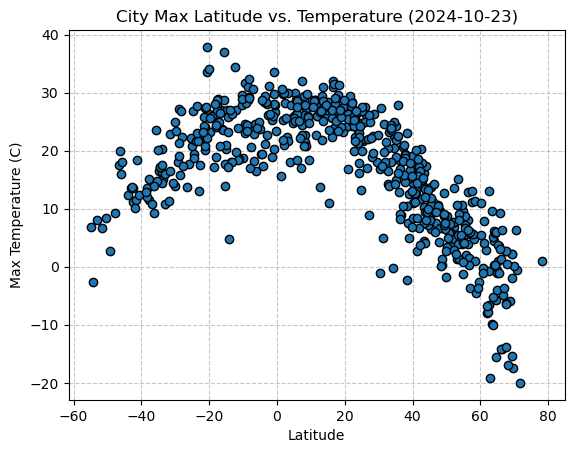

In [24]:
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')

# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolors='black')
plt.title(f"City Max Latitude vs. Temperature ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

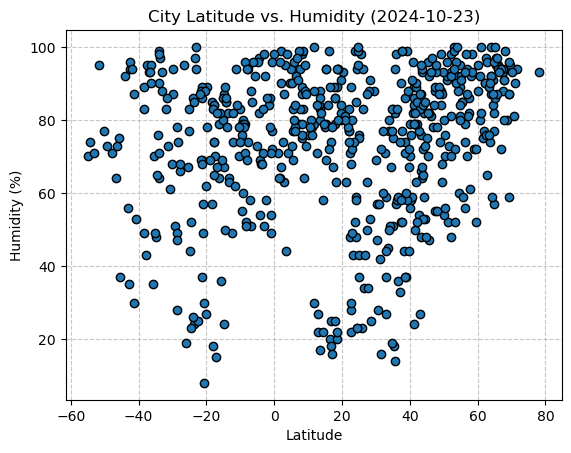

In [25]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Humidity ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

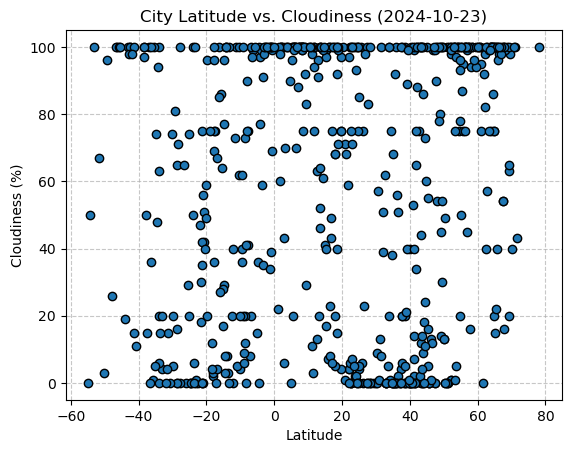

In [26]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']


# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Cloudiness ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

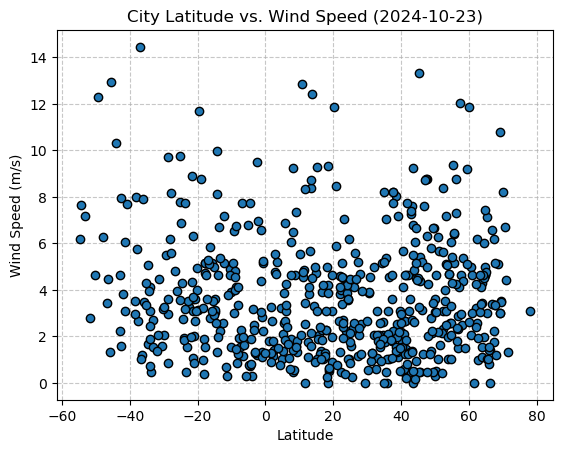

In [27]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Wind Speed ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def create_linear_regression(x, y, x_titles, y_titles):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # Print the regression statistics
    print("r-value  : ", r_value, "\np-value  : ", p_value, "\nstd-error: ", std_err)

    # Create regression line values
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    print(line_eq)

    # Create Plot
    plt.scatter(x, y, edgecolors='black')
    plt.title(f"{x_titles} vs. {y_titles} ({today})")
    plt.plot(x, regress_values, "r-", label=line_eq)

    # Label plot and annotate the line equation
    plt.xlabel(x_titles)
    plt.ylabel(y_titles)
    plt.grid(linestyle='--', alpha=0.7)
    plt.gca().set_axisbelow(True)

    # Dynamic annotation positioning
    plt.annotate(line_eq, (x.mean(), y.mean()), fontsize=15, color="red")

    # Show the legend for the regression line
    plt.legend()

    # Show plot
    plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nemuro,43.3236,145.5750,16.15,76,0,7.59,JP,1729735133
1,brisas de zicatela,15.8369,-97.0419,26.98,84,7,2.08,MX,1729735134
2,monywa,22.1167,95.1333,24.71,83,97,4.61,MM,1729735135
4,cold lake,54.4502,-110.2017,3.97,60,75,2.57,CA,1729735139
5,udachny,66.4167,112.4000,-14.23,94,98,1.41,RU,1729735140


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,san antonio de pale,-1.4014,5.6325,25.36,84,100,6.59,GQ,1729735137
8,waitangi,-43.9535,-176.5597,12.36,92,19,10.32,NZ,1729735144
10,whangarei,-35.7317,174.3239,23.50,35,1,3.49,NZ,1729734995
12,pisco,-13.7000,-76.2167,18.03,82,3,6.69,PE,1729735149
13,kirakira,-10.4544,161.9205,29.53,70,62,4.89,SB,1729735151


###  Temperature vs. Latitude Linear Regression Plot

r-value  :  -0.8675177349849944 
p-value  :  1.658532121105967e-125 
std-error:  0.014274611603988857
y = -0.5x + 32.77


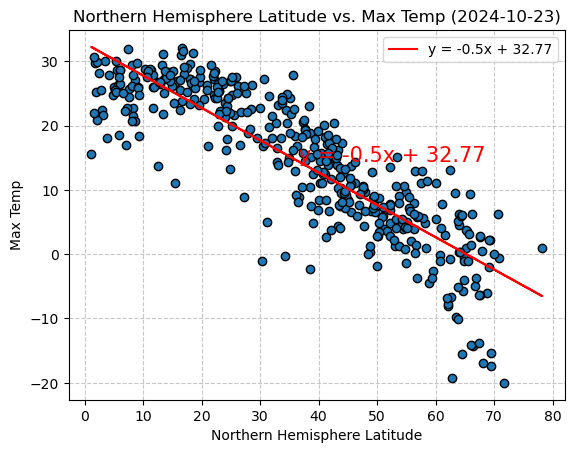

In [31]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Max Temp' )

r-value  :  0.6805013877099728 
p-value  :  5.835678739629615e-26 
std-error:  0.02722554165715197
y = 0.34x + 28.43


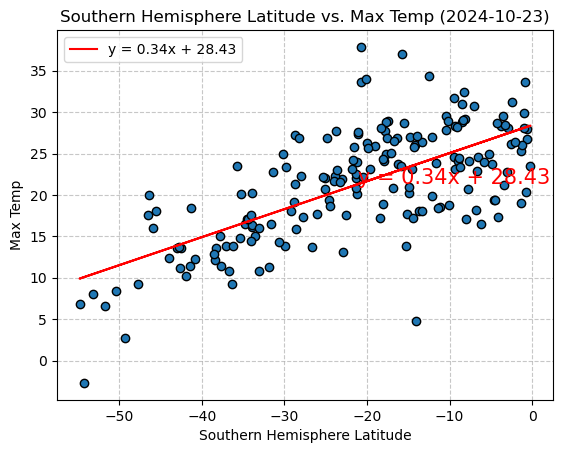

In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r-value  :  0.2000383084461405 
p-value  :  4.6133699316486873e-05 
std-error:  0.051849799441063056
y = 0.21x + 66.79


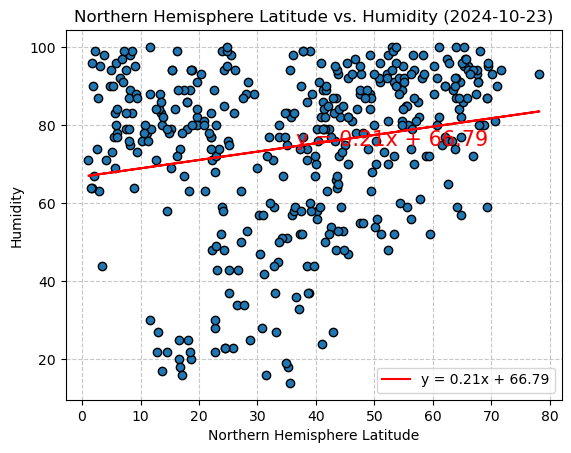

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Humidity')

r-value  :  0.054519526851004085 
p-value  :  0.4660347398480551 
std-error:  0.11198212563731583
y = 0.08x + 72.89


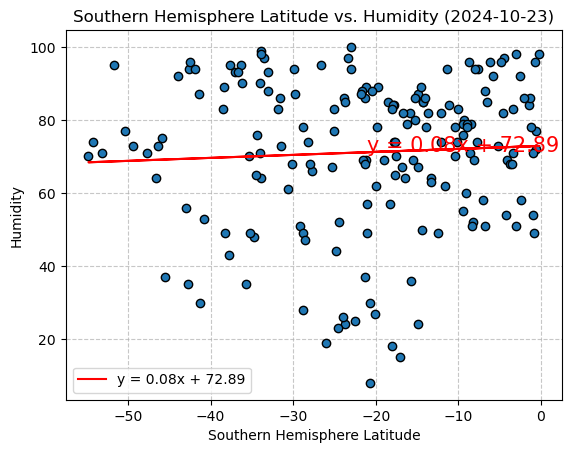

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r-value  :  0.04308875159798885 
p-value  :  0.38476356364677455 
std-error:  0.10707987288244132
y = 0.09x + 56.12


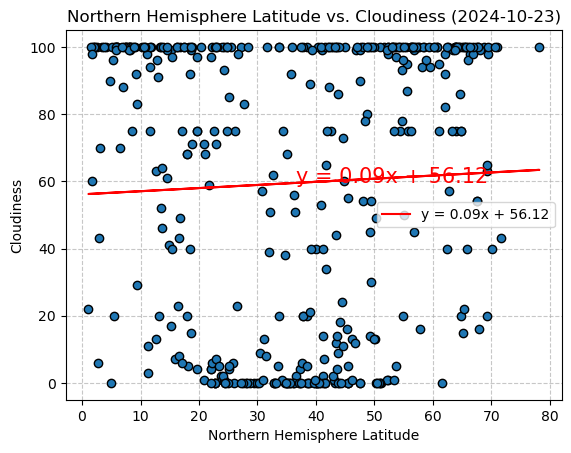

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Cloudiness')

r-value  :  0.08176443104811956 
p-value  :  0.2738497043839071 
std-error:  0.21526414070793182
y = 0.24x + 55.98


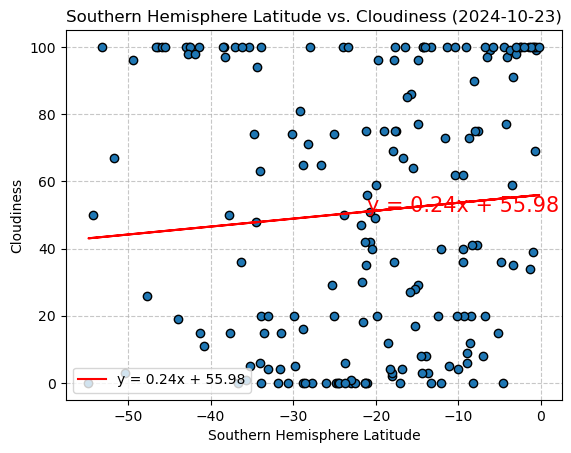

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r-value  :  0.11002543649569642 
p-value  :  0.02607614082429138 
std-error:  0.006338591824582131
y = 0.01x + 2.92


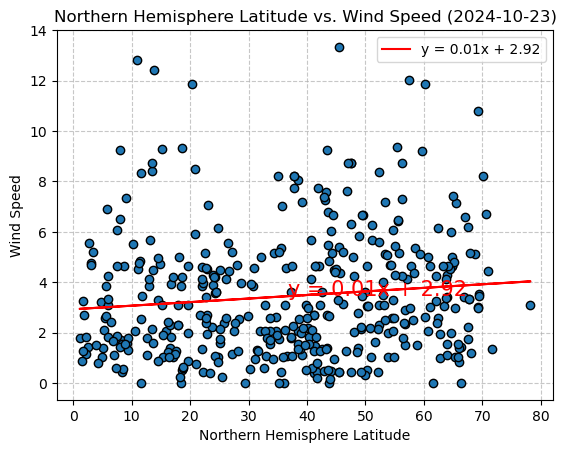

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Wind Speed')

r-value  :  -0.2336804428809499 
p-value  :  0.0015454077017236795 
std-error:  0.014167034731285584
y = -0.05x + 3.04


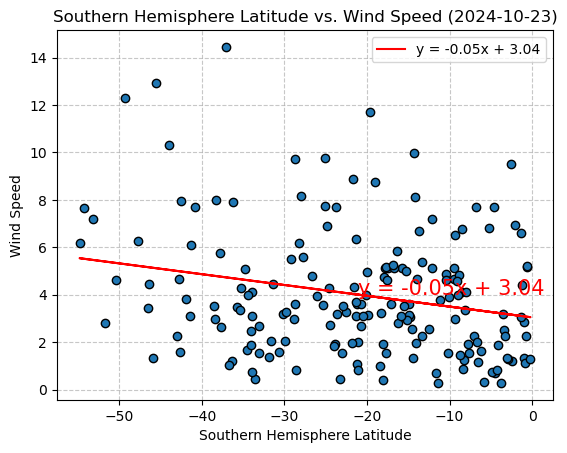

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Wind Speed')

**Discussion about the linear relationship:** when examining the correlation between latitude and wind speed values (r-value or correlation coefficient) for both the Northern and Southern Hemispheres, the results show practically no linear relationship between these two variables. Any minor positive or negative trends observed are so weak that they likely reflect random fluctuations in the data rather than a true association. This suggests that latitude does not have a meaningful impact on wind speed in these regions.